### 載入套件

In [1]:
import random
import pandas
import matplotlib.pyplot as plt

### 遊戲規則、 idea 和定義函數
#### 遊戲規則
1. 頭獎整體中獎率大約5%，貳獎整體中獎率大約10%
1. 頭獎和貳獎不能同時中獎
1. 不要讓參與遊戲的人，在最初五次抽獎都完全沒中獎
1. 儘量不要連續抽中獎，但也不可以完全沒機會連續抽中獎
1. 不要讓參與遊戲的人，連續參加20次以上卻完全沒有中過獎  

#### idea
* 讓中獎率隨著累積沒中次數增加而增加，累積十九次沒中後保證中獎
    * 使起初的中獎率低於5%和10%，同時可以降低連續中獎機率  
    
#### 定義函數
* **generate_prizepool(jacket=7, second=15, guarantee=20)**  
    * 用來生成保底次數內的獎池集合
    * 可設定頭獎、貳獎數量和保底中獎次數
    * 函數中產生沒中獎數量並隨機分成 *(保底次數-1)* 段，由大到小排序作為第一次至第十九次抽獎中包含的沒中獎數
        * 使中獎率隨抽獎次數遞增
        * 累積十九次沒中後，第二十次的獎池只有頭獎跟貳獎，保證中獎
    * 回傳一個欄位有頭獎、貳獎和沒中獎數量的表格，二十列每列表示每次抽獎的獎項數  
    
    
* **plot_prizepool(data)**
    * 畫出獎池集合的柱狀圖
    
    
* **iterate_prizepool(data, i=1)**
    * 用於產生和更新獎池
    * 0表沒中獎；1表貳獎；2表頭獎
    * i 表示使用上述生成的獎池集合的第幾列抽獎。初始設為 1 ，即新的集合第一次抽獎，中獎率最低
    * 後續隨著抽獎規則和累積沒中次數調整 i 的值  
    
    
* **lottery(prizepool)**
    * 進行一次抽獎行為
    * 回傳 0(沒中獎)、1(中二獎)、2（中頭獎)

In [2]:
def generate_prizepool(jackpot=7,second=15,guarantee=20): #頭獎7個,二獎15個,保底20次中獎
    
    #銘謝惠顧數量
    failed=guarantee*(100-(jackpot+second))
    
    #將銘謝惠顧數量隨機分成19份並由大到小排序
    s=sorted(random.sample(range(1,failed),k=guarantee-2),reverse=True)
    s.insert(0,failed)
    s.append(0)
    gap=[]
    for i in range(guarantee-1):
        gap.append(s[i]-s[i+1])
    gap=sorted(gap,reverse=True)
    gap.append(0)
    
    #生成此次保底的獎池集
    data=pandas.DataFrame(data={
        'jackpot':jackpot,
        'second':second,
        'failed':gap
    })
    
    #index設為抽獎次數
    data.index=range(1,guarantee+1)
    
    data['sum']=data['jackpot']+data['second']+data['failed']  #目前沒用到
    return data

#### 頭獎和貳獎合併稱為中獎，數字表示中獎率

In [3]:
def plot_prizepool(data):
    labels=data.index
    win=data['jackpot']+data['second']
    fail=data['failed']
    plt.figure(figsize=(4, 3), dpi=120)
    #中獎
    plt.bar(labels, win, label="win")
    #未中獎
    plt.bar(labels, fail, bottom=win, label="failed")
    plt.legend(loc="upper right")
    for i in labels:
      plt.text(i,
              win[i] + fail[i] + 1,                 # 計算垂直高度
              round(win[i]/(win[i]+fail[i]),2),
              fontsize=5,
              horizontalalignment='center')
    plt.show()

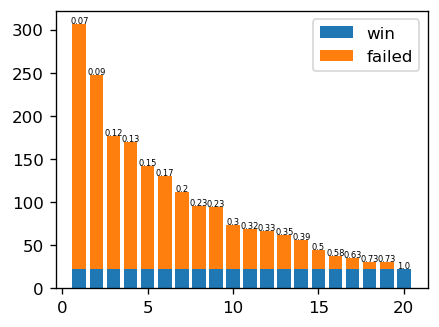

In [4]:
plot_prizepool(generate_prizepool())

In [5]:
def iterate_prizepool(data,i=1):
    
    prizepool=[0]*data['failed'][i]+[1]*data['second'][i]+[2]*data['jackpot'][i]
    
    return prizepool

In [6]:
def lottery(prizepool):
    
    #從獎池隨機抽一個獎
    result=random.choice(prizepool)
    
    return result

### 模擬抽獎一萬次
* 最初將生成獎池集合的函數 guarantee 設為 5，可達到最初五次至少中獎一次
* 中獎後生成新的獎池集合（保底二十次會中獎），並將累積沒中次數歸零

In [7]:
highest=0  #累積沒中次數
chighest=[] #遊戲中累積沒中次數
data=generate_prizepool(guarantee=5)  #生成一個保底五次的奬池集
prizepool=iterate_prizepool(data,i=1)  #初始獎池
totalresult=[]
for i in range(10000):
    result=lottery(prizepool)
    totalresult.append(result)
        
    #若沒中獎沒中次數加一，若中獎則生成新獎池集，沒中次數歸零
    if result == 0:
        highest += 1
    else:
        data=generate_prizepool()  #保底預設為20抽
        chighest.append(highest)
        highest=0
        
    #更新獎池
    prizepool = iterate_prizepool(data, i=highest+1)

In [8]:
print("沒中獎佔了",round(totalresult.count(0)/10000*100,2), "%\n")
print("抽中二獎佔了",round(totalresult.count(1)/10000*100,2), "%\n")
print("抽中頭獎佔了", round(totalresult.count(2)/10000*100,2), "%\n")

沒中獎佔了 84.09 %

抽中二獎佔了 11.02 %

抽中頭獎佔了 4.89 %



In [9]:
print("第一次中獎發生在第", chighest[0]+1,"次抽獎")

第一次中獎發生在第 4 次抽獎


In [10]:
print("最多連續沒中次數為", max(chighest), "次")

最多連續沒中次數為 19 次


### 玩家兩次中獎間抽獎次數

In [11]:
cumulative_highest=[]
for i in range(20):
    cumulative_highest.append(chighest.count(i))

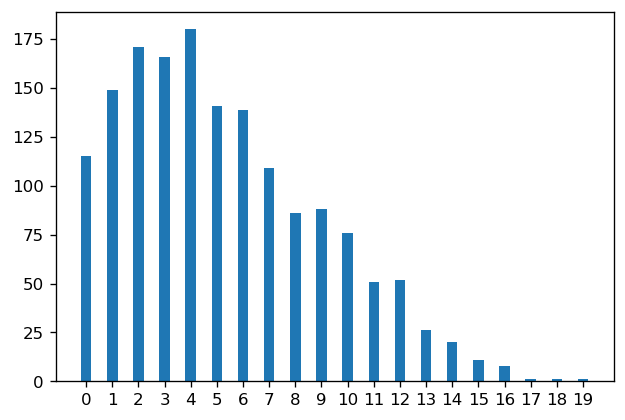

In [12]:
labels = range(20)
plt.figure(figsize=(6, 4), dpi=120)
plt.bar(labels, cumulative_highest, width=0.4)
plt.xticks(range(20))
plt.show()

### 總中獎次數中，連續中獎比例

In [13]:
data=[cumulative_highest[0],sum(cumulative_highest[1:])]
labels=['winning streak', 'no winning streak']

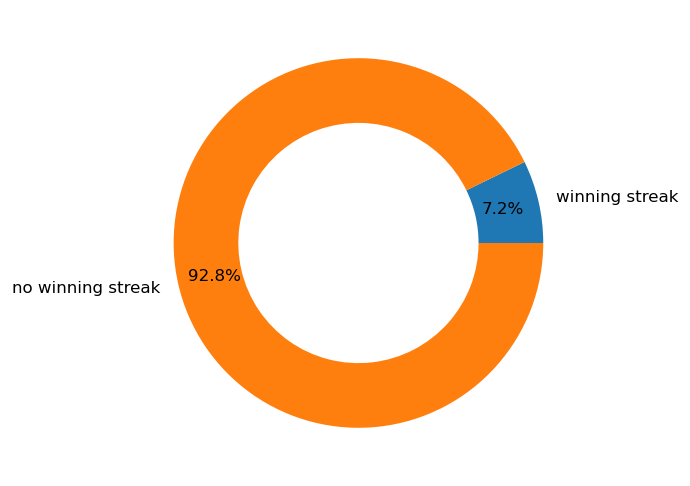

In [14]:
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(
    data,
    autopct='%.1f%%',
    radius=1,
    pctdistance=0.8,
    wedgeprops=dict(linewidth=1, width=0.35),
    labels=labels
)
plt.show()